In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
x = range(100)

/Users/kiki/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
print x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [3]:
y=[]
for i in range(100):
   y.append(x[i]**2) 

In [4]:
print y

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]


<IPython.core.display.Javascript object>


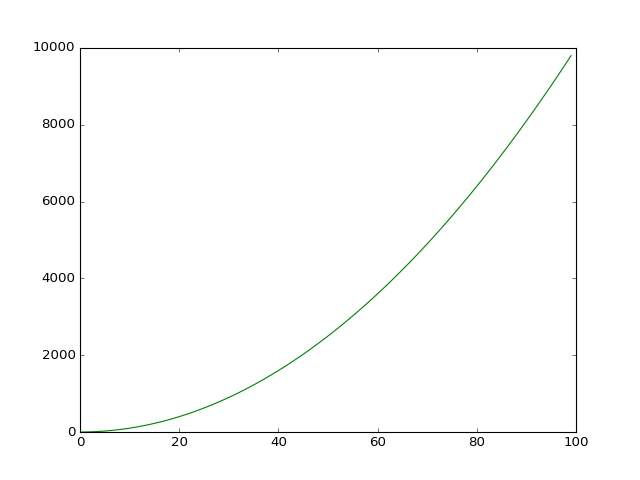

In [5]:

plt.plot(x,y, '-g')

In [6]:
plt.savefig('fileout_test.png')

In [7]:
# Returns True in inside hexagon, rectangle and square
def hex_c(x, y, rad, ang=0.0):
    # Rotate coordinates
    cs = math.cos(ang)
    ss = math.sin(ang)
    xr = cs * x + ss *y
    yr = -ss * x + cs *y
    d = rad * 2
    dx = np.abs(xr) / d
    dy = np.abs(yr) / d
    a = 0.25 * math.sqrt(3.0)
    return (dy <= a) & (a*dx + 0.25*dy <= 0.5*a)

In [8]:
def simulate_point_like_profile(seeing_profile, psf, fibrad, angle=0.0, xsize=12.5, ysize=12.5):
    # Simulation of the fraction of flux in each spaxel
    # By convolution of the seeing profile with the
    # spaxel shape
    # Simulation size
    # xsize, ysize
    # Pixel size for simulation
    Dx = 0.005
    Dy = 0.005

    xx, yy, xs, ys, xl, yl = setup_grid(xsize, ysize, Dx, Dy)
    # print('generate hex kernel')
    # fibrad without units
    hex_kernel = hex_c(xx, yy, rad=fibrad, ang=angle / 180.0 * math.pi)

    # print('generate seeing profile')
    sc = seeing_profile(xx, yy)

    # print('convolve hex kernel with seeing profile')
    # Convolve model gaussian with hex kernel
    convolved = signal.fftconvolve(hex_kernel, sc, mode='same')

    # print('setup 2D interpolator for point-like object')
    # Interpolate
    rbs = RectBivariateSpline(xs, ys, convolved)

    def fraction_of_flux(offpos0, offpos1):

        # Check those that are inside the convolved image
        result = np.zeros_like(offpos0)
        validfibs = rect_c(offpos0, offpos1, 2 * xl, 2 * yl)

        # import matplotlib.pyplot as plt
        # plt.imshow(sc, extent=[-xl-0.5*Dx, xl+0.5*Dx, -yl-0.5*Dy,yl+0.5*Dy], origin='lower')
        # plt.scatter(offpos0[validfibs], offpos1[validfibs])
        # plt.show()

        # Sample convolved image
        # In the positions of active fibers
        #
        values = rbs.ev(offpos0[validfibs], offpos1[validfibs]) * Dx * Dy
        # scales include the cover
        result[validfibs] = values
        return result

    return fraction_of_flux